In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [6]:
data = pd.read_csv("reed_uk.csv")

In [3]:
data

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,science jobs,Oxfordshire,Hays Specialist Recruitment Limited,uk,reed,Apply now Scientist - Cell Based Assays - Neu...,NaN,Scientist In vitro Cell-Free & Cell Based Assays,"Contract, full-time",3/7/2018,£22.00 - £26.00 per hour,South East England
49996,graduate training internships jobs,Northampton,The Graduate,uk,reed,Apply now Our client is looking for high achi...,Required skills Blue Chip Communication Skill...,Graduate Training Scheme - Recruitment,"Permanent, full-time",3/9/2018,"£18,000 - £21,000 per annum",Northamptonshire
49997,strategy consultancy jobs,City of London,Capgemini Consulting,uk,reed,Apply on employer's website Who youâ€™ll be w...,NaN,"Management Consultant - Retail Buying, Merchan...","Permanent, full-time",2/17/2018,Competitive salary,London
49998,purchasing jobs,Egham,Concept Human Solutions,uk,reed,"Apply now UNDERSTANDING, SERVICE, TRUST3 Word...",Required skills Procurement AV,AV Procurement Assistant,"Permanent, full-time",3/6/2018,"£27,500 - £30,000 per annum, negotiable, OTE",Surrey


In [4]:
data.geo.unique()

array(['uk'], dtype=object)

In [5]:
data.job_board.unique()

array(['reed'], dtype=object)

In [9]:
data.company_name.unique().size

5166

In [11]:
print(data.category.unique())
print(data.category.unique().size)

['catering jobs' 'law jobs' 'factory jobs' 'retail jobs'
 'motoring automotive jobs' 'hr jobs' 'marketing jobs' 'estate agent jobs'
 'customer service jobs' 'accountancy qualified jobs' 'health jobs'
 'logistics jobs' 'finance jobs' 'social care jobs'
 'recruitment consultancy jobs' 'construction property jobs'
 'engineering jobs' 'admin secretarial pa jobs' 'accountancy jobs'
 'sales jobs' 'it jobs' 'education jobs' 'other jobs'
 'security safety jobs' 'energy jobs' 'apprenticeships jobs'
 'training jobs' 'charity jobs' 'strategy consultancy jobs' 'banking jobs'
 'purchasing jobs' 'fmcg jobs' 'leisure tourism jobs' 'science jobs'
 'graduate training internships jobs' 'general insurance jobs'
 'media digital creative jobs']
37


In [12]:
data['post_date'] = pd.to_datetime(data['post_date'], format='%m/%d/%Y')

In [13]:
print(data.post_date.max())
print(data.post_date.min())

2018-03-13 00:00:00
2017-08-31 00:00:00


In [22]:
data.job_title.unique().size

29155

In [23]:
data[~data["salary_offered"].str.contains("£")].salary_offered.unique()[4]

' ‚¬20,000 - ‚¬100,000 per annum '

In [19]:
data[data["salary_offered"].str.contains("¬")]

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
1927,factory jobs,Calne,Park Place Technologies,uk,reed,Apply now Description This EMEA Buyer / Plann...,NaN,Buyer Planner,"Permanent, full-time",2018-02-27,"‚¬20,000 - ‚¬100,000 per annum",Wiltshire
2093,retail jobs,Dublin,Homebase,uk,reed,Apply on employer's website Thereâ€™s never b...,NaN,Team Member G4 - Supervisor,"Permanent, full-time",2018-03-08,"‚¬30,000 per annum",Ireland
2639,catering jobs,Dublin,EMBS,uk,reed,Apply now Accommodation Manager (Student Acco...,NaN,Accommodation Manager Student Accommodation,"Permanent, full-time",2018-03-12,"‚¬30,000 - ‚¬35,000 per annum",Ireland
2716,catering jobs,Donegal,Network Recruitment Ltd.,uk,reed,Apply now Our client is a reputable 4 Star Ho...,Required skills Customer Service Hospitality ...,Restaurant Manager - JO2889,"Permanent, full-time",2018-03-06,"‚¬30,000 per annum",Ireland
3789,retail jobs,Dublin,Homebase,uk,reed,Apply on employer's website Thereâ€™s never b...,NaN,ROI Based / Kitchen CAD Advisor Team Member,"Contract, full-time",2018-03-12,‚¬11.40 per hour,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...
49098,science jobs,Dublin,CK GROUP,uk,reed,Apply now Julie Marshall is recruiting for a ...,NaN,Manufacturing Specialist - Dublin,"Contract, full-time",2018-02-28,‚¬41.00 per hour,Ireland
49140,charity jobs,Peterborough,The One Group,uk,reed,Apply now My highly respected client is looki...,NaN,Corporate Partnership Manager,"Permanent, full-time",2018-03-01,"‚¬27,000 - ‚¬30,000 per annum",Cambridgeshire
49388,banking jobs,Malta,Reed Malta,uk,reed,Apply now Calling out every back office admin...,NaN,Assistant Trust officer,"Permanent, full-time",2018-02-27,"‚¬18,000 - ‚¬19,000 per annum, negotiable",Malta
49460,science jobs,ireland,BMS Performance,uk,reed,Apply now THE COMPANY: With over fifty years ...,Required skills health nutrition,Nutritional Trainer,"Permanent, full-time",2018-03-01,"‚¬34,000 - ‚¬36,000 per annum, negotiable",Ireland


In [21]:
data[data["state"] == "Malta"]

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
1635,hr jobs,St julians,Recruit Gibraltar,uk,reed,Apply now RecruitGibraltar are currently recr...,Required skills Recruitment HR Policies,HR Generalist (Swedish),"Permanent, full-time",2018-03-08,Competitive salary,Malta
1985,factory jobs,Sliema,Triple Three Group (Malta) Limited,uk,reed,Apply now Our client is looking for a reliabl...,Required skills Electrical HVAC Infrastructur...,Electrician,"Permanent, full-time",2018-03-07,Salary negotiable,Malta
4071,retail jobs,SLIEMA,Reed Malta,uk,reed,Apply now Are you a Store Manager looking for...,NaN,Store Manager,"Permanent, full-time",2018-03-09,Salary negotiable,Malta
6063,marketing jobs,Malta,The Candidate Ltd,uk,reed,Apply now Are you tired of the cold British w...,Required skills Engagement Marketing Manager ...,Paid Search Manager,"Permanent, full-time",2018-03-12,"£50,000 per annum",Malta
10522,finance jobs,Malta,Recruitment Connection,uk,reed,Apply now Partner and Associate Partner Cypru...,Required skills Adviser Financial Planning Fi...,Partner and Associate Partner,"Permanent, full-time",2018-02-28,"‚¬150,000 - ‚¬200,000 per annum",Malta
20225,other jobs,SLIEMA,Reed Malta,uk,reed,Apply now Sales ExecutiveHave been working in...,NaN,Sales Executive,"Permanent, full-time",2018-02-28,"‚¬20,000 - ‚¬23,000 per annum",Malta
20350,banking jobs,Malta,Reed Malta,uk,reed,Apply now Are you interested in joining a gro...,NaN,Senior Compliance Administrator,"Permanent, full-time",2018-02-22,"‚¬22,000 - ‚¬25,000 per annum, negotiable",Malta
24640,factory jobs,Sliema,Triple Three Group (Malta) Limited,uk,reed,Apply now Our client is looking for a reliabl...,Required skills Electrical HVAC Infrastructur...,Electrician,"Permanent, full-time",2018-03-07,Salary negotiable,Malta
28642,media digital creative jobs,Malta,Rock Recruiters,uk,reed,Apply now Our client is a growing Internation...,Required skills UI Online Gaming User Experie...,UX/UI Designer - Malta,"Permanent, full-time",2018-02-27,Competitive salary,Malta
29558,customer service jobs,malta,Betting Appointments,uk,reed,Apply now Customer Service Agent - Norwegian ...,NaN,Customer Service Agent - Norwegian speaking,"Permanent, full-time",2018-03-07,"‚¬22,000 - ‚¬23,000 per annum",Malta


In [11]:
map_df = gpd.read_file("shp/Counties_and_Unitary_Authorities_(December_2019)_Boundaries_UK_BFE.shp")
map_df.head()

,objectid,ctyua19cd,ctyua19nm,ctyua19nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447160,531474,-1.27018,54.676140,9.834667e+07,66121.472650,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.455359e+07,41055.809886,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,3,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.567520,2.537854e+08,105292.138896,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,4,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.556911,2.097308e+08,108085.255484,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677,"POLYGON ((423496.602 524724.299, 423497.204 52..."


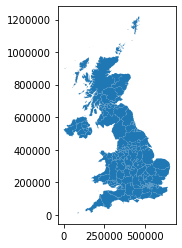

In [12]:
map_df.plot()

In [5]:
map_df.ctyua19nm.unique()

array(['Hartlepool', 'Middlesbrough', 'Redcar and Cleveland',
       'Stockton-on-Tees', 'Darlington', 'Halton', 'Warrington',
       'Blackburn with Darwen', 'Blackpool',
       'Kingston upon Hull, City of', 'East Riding of Yorkshire',
       'North East Lincolnshire', 'North Lincolnshire', 'York', 'Derby',
       'Leicester', 'Rutland', 'Nottingham', 'Herefordshire, County of',
       'Telford and Wrekin', 'Stoke-on-Trent',
       'Bath and North East Somerset', 'Bristol, City of',
       'North Somerset', 'South Gloucestershire', 'Plymouth', 'Torbay',
       'Bournemouth', 'Poole', 'Swindon', 'Peterborough', 'Luton',
       'Southend-on-Sea', 'Thurrock', 'Medway', 'Bracknell Forest',
       'West Berkshire', 'Reading', 'Slough', 'Windsor and Maidenhead',
       'Wokingham', 'Milton Keynes', 'Brighton and Hove', 'Portsmouth',
       'Southampton', 'Isle of Wight', 'County Durham', 'Cheshire East',
       'Cheshire West and Chester', 'Shropshire', 'Cornwall',
       'Isles of Scilly'

In [14]:

list(set(map_df.ctyua19nm.unique()).difference(data["state"].unique()))

['Neath Port Talbot',
 'Southampton',
 'Wakefield',
 'Dudley',
 'Redcar and Cleveland',
 'Wandsworth',
 'Merthyr Tydfil',
 'Kensington and Chelsea',
 'Liverpool',
 'City of Edinburgh',
 'Wokingham',
 'Kingston upon Hull, City of',
 'Carmarthenshire',
 'Hillingdon',
 'Perth and Kinross',
 'Richmond upon Thames',
 'Bracknell Forest',
 'Moray',
 'Newcastle upon Tyne',
 'Tameside',
 'Bexley',
 'Ards and North Down',
 'Rotherham',
 'Islington',
 'Argyll and Bute',
 'North Somerset',
 'Nottingham',
 'Vale of Glamorgan',
 'Darlington',
 'Southend-on-Sea',
 'Sheffield',
 'Slough',
 'Bury',
 'Doncaster',
 'Glasgow City',
 'Blackburn with Darwen',
 'Brighton and Hove',
 'Hartlepool',
 'North Lanarkshire',
 'Haringey',
 'Torbay',
 'Newry, Mourne and Down',
 'Armagh City, Banbridge and Craigavon',
 'Bournemouth, Christchurch and Poole',
 'Swansea',
 'Mid and East Antrim',
 'Coventry',
 'Scottish Borders',
 'Kirklees',
 'Ceredigion',
 'Dundee City',
 'Redbridge',
 'Conwy',
 'Stoke-on-Trent',
 'Luto

In [9]:
data["state"].unique()

array(['Devon', 'Wiltshire', 'East Anglia', 'West Sussex',
       'South East England', 'County Antrim', 'Norfolk', 'Bedfordshire',
       'Lancashire', 'West Yorkshire', 'Warwickshire', 'Hertfordshire',
       'Cumbria', 'Buckinghamshire', 'Midlothian', 'South Glamorgan',
       'Cambridgeshire', 'Leicestershire', 'Cheshire', 'Gloucestershire',
       'Avon', 'West Midlands (Region)', 'West Midlands', 'Kent',
       'Derbyshire', 'Essex', 'London', 'North Humberside', 'Berkshire',
       'East Midlands', 'Barbados', 'Hampshire', 'County Durham',
       'Worcestershire', 'Somerset', 'Nottinghamshire', 'Merseyside',
       'Glasgow', 'Lanarkshire', 'South Yorkshire', 'Surrey',
       'Oxfordshire', 'England', 'Mid Glamorgan', 'Northamptonshire',
       'Lincolnshire', 'Dorset', 'Tyne And Wear', 'Suffolk',
       'West Lothian', 'Shropshire', 'Middlesex', 'South West England',
       'North Yorkshire', 'West Glamorgan', 'East Sussex', 'Angus',
       'Cleveland', 'South Humberside', 'Res